# PRiAD 5 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD5, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń. 

---
**Imię, nazwisko i numer indeksu:** (Aleksandra Kowalczyk 307414)

In [25]:
# TU JESZCZE RAZ NALEŻY WPISAĆ NUMER INDEKSU - ZAMIAST CYFR 123456
indeks = "307414"  

---

Generowanie idywidualnego zestawu danych.

In [36]:
# TEN FRAGMENT NALEŻY PO PROSTU URUCHOMIĆ (NIC NIE NALEŻY ZMIENIAĆ)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
pd.options.display.float_format = "{:.2f}".format 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
if indeks == "123456": 
    print('\nWpisz w pierwszym bloku komend (powyżej) swój numer indeksu !!') 
else:        
    n = np.array(list(indeks),dtype = np.int)
    cechy, klasa = make_classification(n_samples=  (n[0]*11+n[3]*10)*5,  n_classes = n[-2]%3+4, class_sep = n[-4]%2 + 2, n_clusters_per_class = 1,
                                   n_features = 10 - n[-4]%2, n_redundant = 2 - n[-3]%2, n_repeated = n[-3]%2 + 1, n_informative = n[-2]%4+3,                                
                                   random_state = n[0]+n[1]+n[2]+n[5])  
    dane = pd.concat([pd.DataFrame(cechy), pd.DataFrame(klasa, columns =['klasa'])],axis = 1, sort=False)
    print('\nGOTOWE - możesz rozpoczać rozwiązywanie zadań')


GOTOWE - możesz rozpoczać rozwiązywanie zadań


> **Zadanie 1** Oceń na podstawie odpowiednich wykresów przydatność poszczególnych atrybutów zbioru `dane`  do klasyfikacji

Obiektów:  365
Klas:  5
              0         1         2         3         4         5         6  \
0      1.000000 -0.355625 -0.067112 -0.042564  0.702589 -0.298869 -0.542739   
1     -0.355625  1.000000  0.019435  0.066187 -0.833916 -0.341893 -0.145439   
2     -0.067112  0.019435  1.000000  0.146392 -0.031282  0.065498  0.038719   
3     -0.042564  0.066187  0.146392  1.000000 -0.045142  0.024963  0.030648   
4      0.702589 -0.833916 -0.031282 -0.045142  1.000000  0.312209  0.026558   
5     -0.298869 -0.341893  0.065498  0.024963  0.312209  1.000000  0.413741   
6     -0.542739 -0.145439  0.038719  0.030648  0.026558  0.413741  1.000000   
7     -0.277710  0.388059  0.042405  0.076701 -0.088549  0.397940  0.629502   
8     -0.355625  1.000000  0.019435  0.066187 -0.833916 -0.341893 -0.145439   
klasa  0.024132 -0.013035 -0.063882 -0.033385 -0.230986 -0.630749 -0.250779   

              7         8     klasa  
0     -0.277710 -0.355625  0.024132  
1      0.388059  1.000000 -0.0

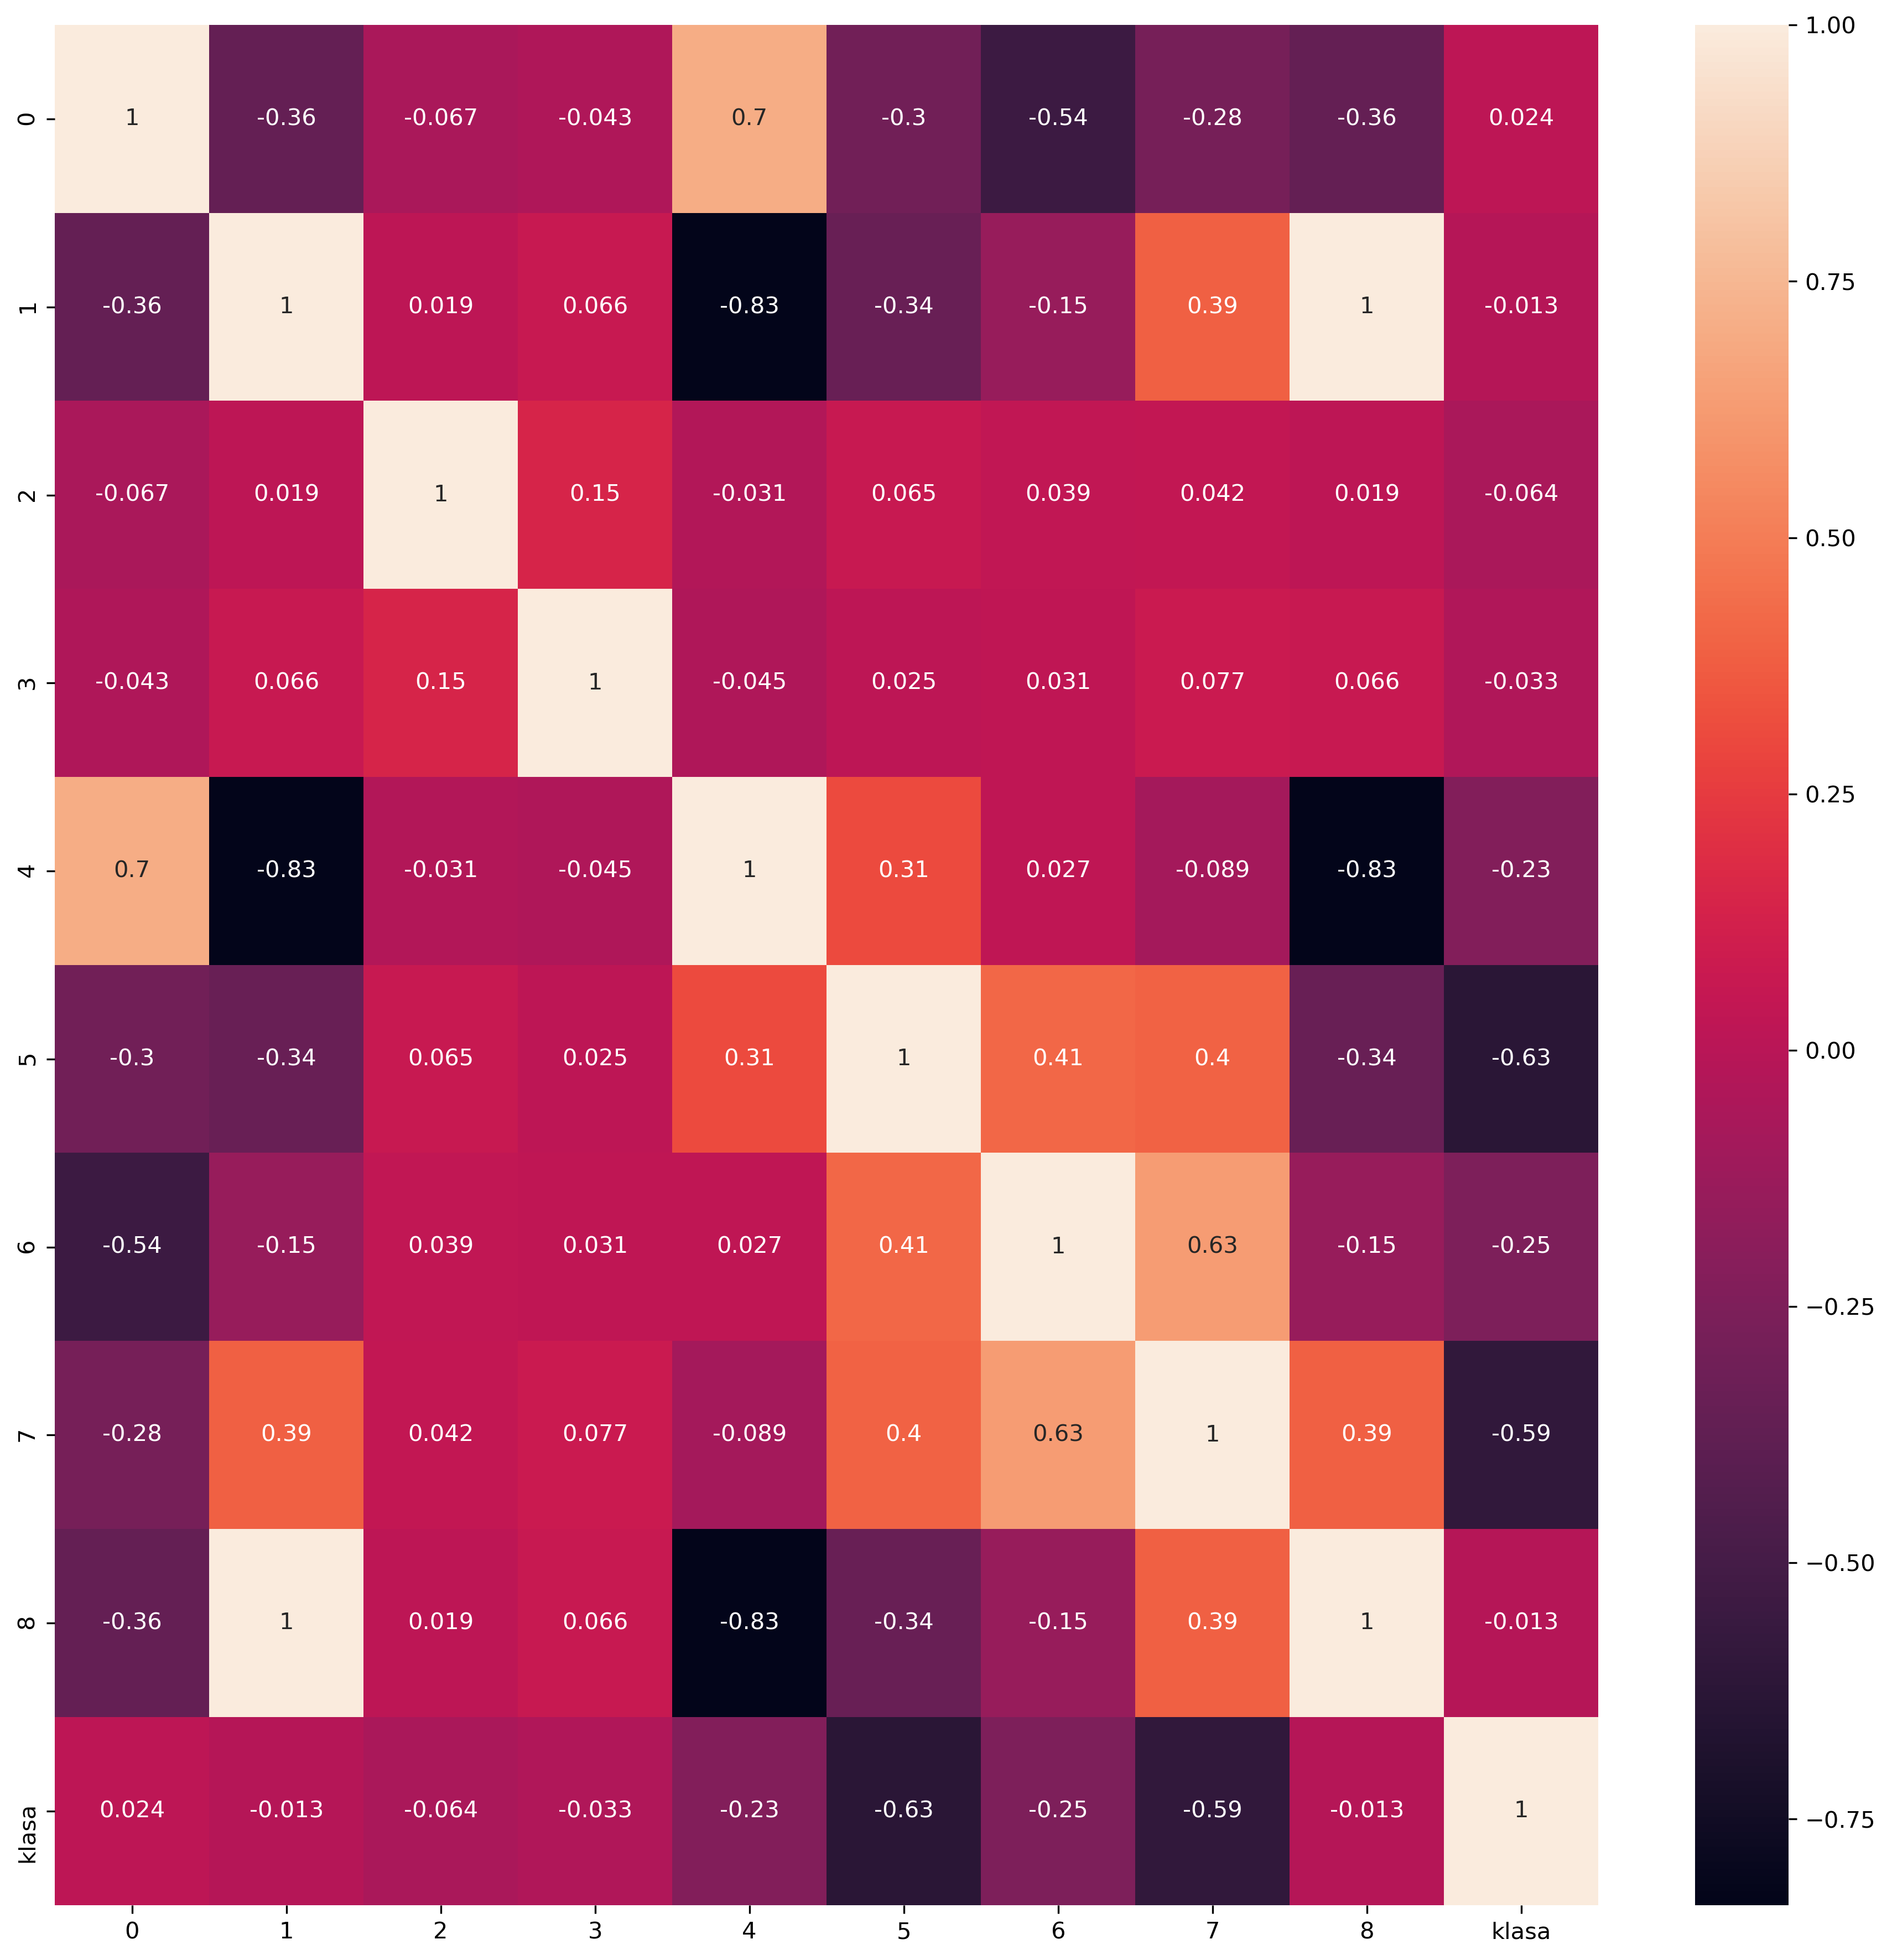

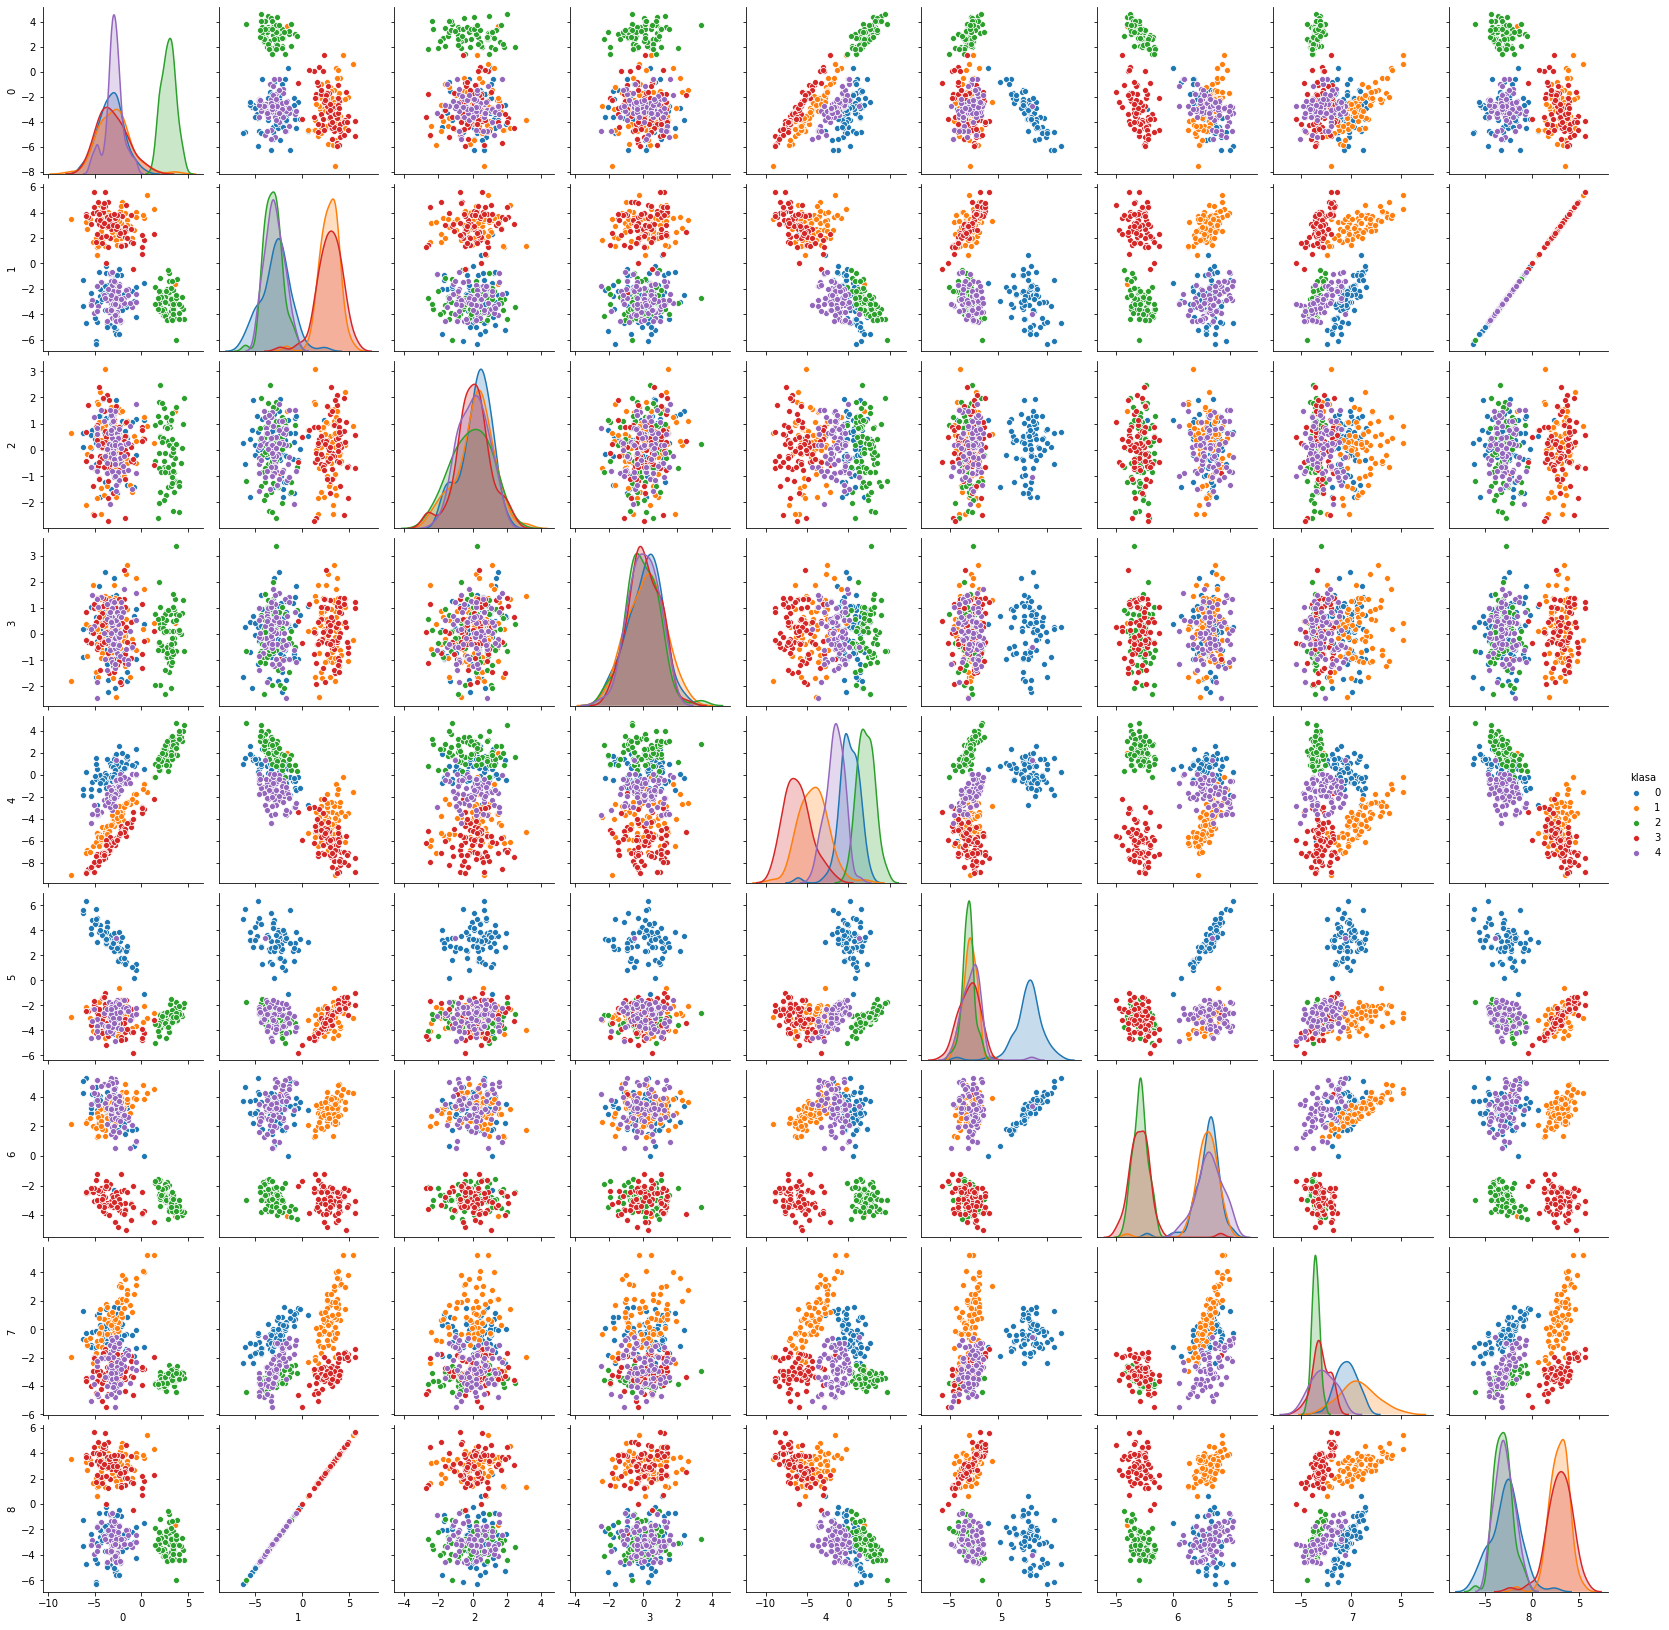

In [27]:
# kod (wyświetlanie wykresu, na postawie którego będzie można określić przydatność poszczególnych atrybutów)
print('Obiektów: ', dane.shape[0])
kl = dane.iloc[:,-1]
print('Klas: ' , kl.unique().shape[0])

kor = dane.corr()
print(kor)
plt.figure(figsize=(15,15), dpi=300)
sns.heatmap(kor, annot = kor)

sns.pairplot(dane, kind="scatter", hue="klasa")

Tu wpisz wybrane atrybuty (numery):
* atrybut 0 pozwala odróżnić klasę 2 od reszty klas
* atrybut 1 pozwala odróżnić kalsę 1 i 3 od reszty klas
* atrybut 2 i 3 nie pozwalają na rozróżnienie klas (dodatkowo warto zauważyć że są bardzo podobne)
* atrybut 4 pozwala nam najliej ze wszystkich rozrożnić od siebie wszystkie dostępne klasy, jednak nie wyodrębnia na tyle wyraźnie (grupy obiektów częściowo nakładają się) by móc z pewnością wyodrębić klasy
* atrybut 5 pozwala odróżnić klasę 0 od reszty klas
* atrybut 6 pozwala odróżnić klasę 1 i 2 od reszty klas
* atrybut 7 nie pozwala na odróżnienie od siebie klas 
* atrybut 8 jest identyczny jak atrybut 1, dlatego on jest już bezużyteczny

> **Zadanie 2** Przetestuj 6 wybranych klasyfikatorów i wybierz najlepszy z nich (w przypadku k-NN możesz użyć jedynie dwóch wartości k, traktując klasyfikaotry z takimi wartościami k jako odrębne, także w przypadku drzewa decyzyjnego możesz użyć jedynie dwóch wartości argumentu określającego stopień dopasowania drzewa).

In [37]:
def podziel(df,proporcja):
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}



In [38]:
def weryfikuj(model,dane,atryb,x):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego "+ x)
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego "+ x)
    print(pd.crosstab(dane["dec_test"],wynik_test)) 

In [39]:
def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    if (kontur == 1):    
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Macierz pomyłek dla zbioru uczącego KNN k=1
col_0   0   1   2   3   4
row_0                    
0      53   0   0   0   0
1       0  56   0   0   0
2       0   0  50   0   0
3       0   0   0  44   0
4       0   0   0   0  52
Macierz pomyłek dla zbioru testowego KNN k=1
col_0   0   1   2   3  4
row_0                   
0      10   1   0   0  9
1       0   7   0  11  0
2       0   1  21   0  0
3       2  11   0  16  0
4      13   0   0   0  8
Macierz pomyłek dla zbioru uczącego KNN k=3
col_0   0   1   2   3   4
row_0                    
0      37   1   0   0  15
1       0  48   1   7   0
2       0   0  50   0   0
3       0  14   0  29   1
4       5   0   0   0  47
Macierz pomyłek dla zbioru testowego KNN k=3
col_0   0   1   2   3   4
row_0                    
0      10   1   0   0   9
1       0  12   0   6   0
2       0   0  22   0   0
3       2  11   0  16   0
4       7   0   0   0  14
Macierz pomyłek dla zbioru uczącego najbliższy prototyp
col_0   0   1   2   3   4
row_0              

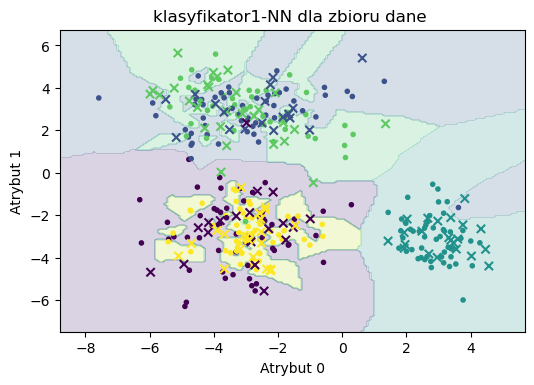

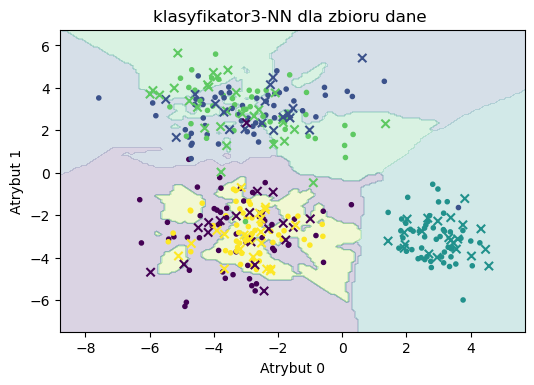

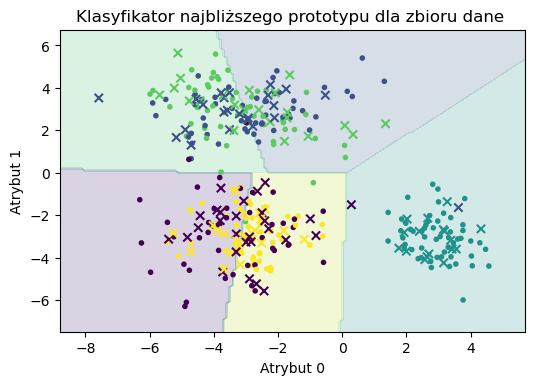

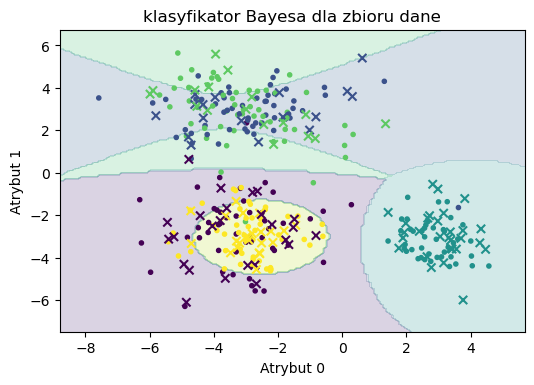

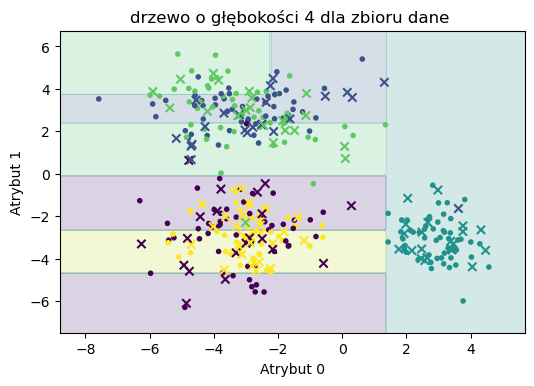

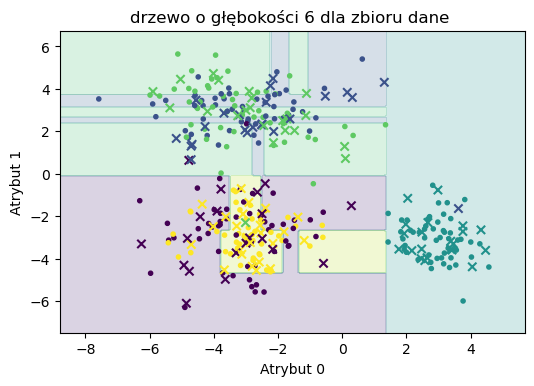

In [57]:
# klasyfikator najblższego sąsiada i 3-najblższych sąsiadów
df = dane.copy()
d = podziel(df,0.3)
for k in [1,3]:
    model = KNeighborsClassifier(n_neighbors=k)
    tekst = "klasyfikator" + str(k) + "-NN dla zbioru dane "
    granice(model,d,0,1,tekst)
    plt.xlabel('Atrybut 0')
    plt.ylabel('Atrybut 1')
    weryfikuj(model,d,[0,1],"KNN k="+str(k))

            
# metoda najbliższych prototypów
df = dane.copy()
d = podziel(df,0.3)
model = NearestCentroid()
granice(model,d,0,1,"Klasyfikator najbliższego prototypu dla zbioru dane ")
plt.xlabel('Atrybut 0')
plt.ylabel('Atrybut 1')
weryfikuj(model,d,[0,1],"najbliższy prototyp")

# naiwny klasyfikator Bayesa
df = dane.copy()
d = podziel(df,0.3)
model = GaussianNB()
granice(model,d,0,1,"klasyfikator Bayesa dla zbioru dane")
plt.xlabel('Atrybut 0')
plt.ylabel('Atrybut 1')
weryfikuj(model,d,[0,1],"Klasyfikator Bayesa")

#Drzewo decyzyjne o głębokości 4 i 6

df = dane.copy()
d = podziel(df,0.3)
for k in [4,6]:
    drzewo = tree.DecisionTreeClassifier(max_depth=k)
    tekst = "drzewo o głębokości " + str(k) + " dla zbioru dane "
    granice(drzewo,d,0,1,tekst)
    plt.xlabel('Atrybut 0')
    plt.ylabel('Atrybut 1')
    weryfikuj(drzewo,d,[0,1],"Drzewo decyzyjne o głębokości: "+str(k))


Wnioski z zad. 2 (który klasyfikator jest najlepszy i dlaczego - w uzasadnieniu odnieś się do otrzymanych powyżej danych):
* Stosuję macierz pomyłek, jako sposób oceny, który klasyfikator był najlepszy (czyli jeśli macierz jest jak najbardziej zbliżona do macierzy diagonalnej)
* by móc określić która macierz jest najbardziej zbliżona do diagonalnej obliczam miary "preciosion" i "recall"
* dla 1 klasyfikatora:najbliższego sąsiada wynik macierzy uczącej jest oczywisty, wszystkie obiekty są dobrze dopasowane- uzyskujemy macierz diagonalną( bez względu na dane wejściowe). Dla danych testowych miara precision wynosi 55,5% a recall 61,06%
* dla 2 klasyfikatora: dla macierzy testowej miara precision wynosi 67,70%, zaś recall 67,25%
* dla 3 klasyfikatora: dla macierzy testowej miara precision wynosi 54,33%, zaś recall 52,88%
* dla 4 klasyfikatora: dla macierzy testowej miara precision wynosi 69,23%, zaś recall 70,14%
* dla 5 klasyfikatora: dla macierzy testowej miara precision wynosi 59,36%, zaś recall 58,92%
* dla 6 klasyfikatora: dla macierzy testowej miara precision wynosi 69,41%, zaś recall 69,69%
* podsumowując najlepszy okazuje się klasyfikator 4, czyli klasyfikator Bayesa, jednak prawie równie dobry jest klasyfikator 6: drzewo decyzyjne o głębokości 6

> **Zadanie 3** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD5_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.